In [15]:
import zipfile
zip_ref = zipfile.ZipFile('/content/catdog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [36]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [37]:

conv_base = VGG16(
    weights='imagenet', #using the weights of VGG16
    include_top = False, #Feature extraction mode ON, means con layers are only using and we are not using Dense layer of VGG16
    input_shape=(150,150,3)
)

In [38]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [39]:
conv_base.trainable = False #we are freezing the Con layers of VGG16, means they will not train again

In [40]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [49]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content//new/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/new/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
32/32 [==============================] - 6s 116ms/step - loss: 9.4370 - accuracy: 0.7720 - val_loss: 0.2734 - val_accuracy: 0.8920
Epoch 2/10
32/32 [==============================] - 4s 108ms/step - loss: 0.1300 - accuracy: 0.9530 - val_loss: 0.1732 - val_accuracy: 0.9300
Epoch 3/10
32/32 [==============================] - 5s 149ms/step - loss: 0.0387 - accuracy: 0.9830 - val_loss: 0.1775 - val_accuracy: 0.9280
Epoch 4/10
32/32 [==============================] - 4s 109ms/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.1826 - val_accuracy: 0.9360
Epoch 5/10
32/32 [==============================] - 4s 110ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1951 - val_accuracy: 0.9340
Epoch 6/10
32/32 [==============================] - 4s 130ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1950 - val_accuracy: 0.9340
Epoch 7/10
32/32 [==============================] - 4s 110ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1984 - val_accuracy: 0.9360
Epoch 

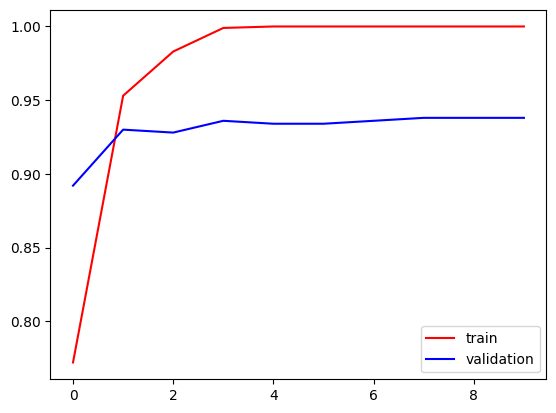

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [34]:
#We can see Overfitting here because we use very small no. of data set from the actual data.
#We are using only 1500 data from overall 25000,because the whole process is done for learning purposs
